<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2023/blob/main/esonero1/MetodiAI_Fis2023_Esonero_1_EsempioPossibileSoluzione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prima Prova Esonero - Metodi AI e Machine Learning per la fisica 
### 5.4.2023 - AA 2022/23 - Docente: S. Giagu


> **Regole:**

*   **tempo a disposizione:** 1h45'

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito* usando questo notebook 
*   una volta completato il compito sottomettere il notebook nel apposito folder sul sito e-learning del corso disponibile al link: <p>
[consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=551290)<p>
NOTA BENE: una volta sottomesso il notebook non sono più possibili ulteriori modifiche

In [ ]:
#@ Dati Personali
import os

Nome = 'Stefano'  #@param {type: "string"}
Cognome = 'Giagu' #@param {type: "string"}
NumeroMatricola = 12345678 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!') 
else:
  print('Done')

 Inserisci il numero di matricola corretto!!!!


# Descrizione del compito:


**Risolvere i seguenti compiti:**

1.   Generare due dataset con le seguenti caratteristiche:
- ogni dataset deve essere costituito da 10000 esempi (eventi)
- ogni evento deve essere caratterizzato da 5 osservabili (features) $x_0, x_1, x_2, x_3, x_4$ e da 1 target continuo $y$, legati dalla relazione funzionale:

> $ y = 10\sin(\pi x_0 x_1) + 20(x_2-0.5)^2 + 10x_3 + 5x_4 + \sigma*N(0,1)$

> in cui $N(0,1)$ rappresenta un rumore random estratto per ogni evento del dataset in accordo ad una distribuzione normale a media zero e varianza 1;
> $\sigma$ è una costante che assume valore $0.5$ per il primo dataset, e $5$ per il secondo dataset

- per ogni evento di ciascun dataset, le feature $x_0, x_1, x_2, x_3, x_4$ è sono estratte indipendentemente l'una dall'altra da una distribuzione uniforme nell'intervallo $[0,1]$.

2. Graficare gli scatter plot delle coppie di features ($(x_0,x_1), (x_0,x_2), \cdots , (x_4,x_4)$) colorando ciascun punto in accordo al valore del target $y$, per i due dataset (produrre una matrice di 5x5 plots per ciasun dataset).

3. Dividere i due dataset in training, validation e test set, con frazioni 60%:20%:20%;

4. Allenare un algoritmo di regressione basato su k-NN a predire il target $y$ a partire da un valore di input features $x_0,x_1,\cdots,x_4$, per ciascunodei due dataset e stimarne le prestazioni in termini di MSE e MAE.

5. Graficare per entrambi i dataset l'andamento dell'MSE in funzione del numero di primi vicini del modello $k$, per il campione di training e per quello di validazione. Commentare gli anadamenti osservati.

5. Graficare per i due modelli il target predetto ($\hat{y}$) vs $y$ vero e l'istogramma di $y-\hat{y}$.

6. Dire se è possibile, per il dataset più rumoroso (quello con $\sigma=5$) ottenere prestazioni migliori usando un regressore basato su una RandomForest. Commentare il risultato osservato.

* commentare opportunamente i risultati ottenuti in ogni punto

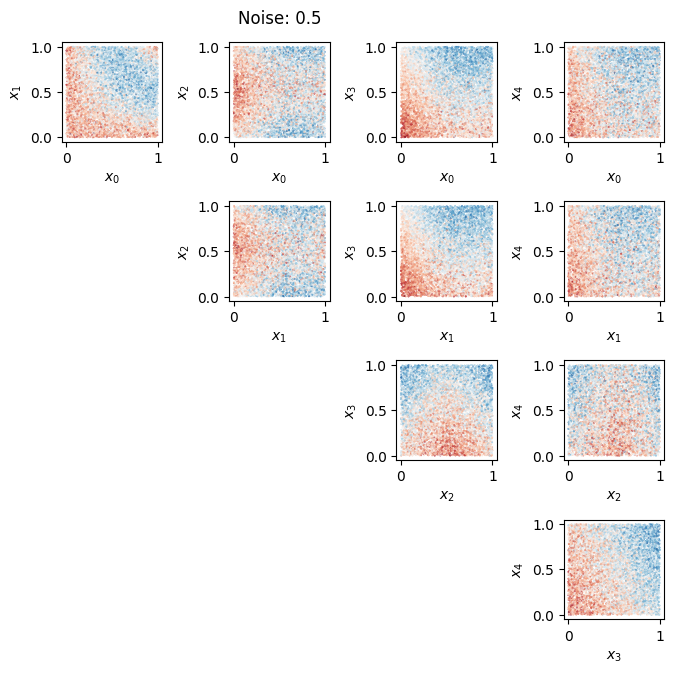

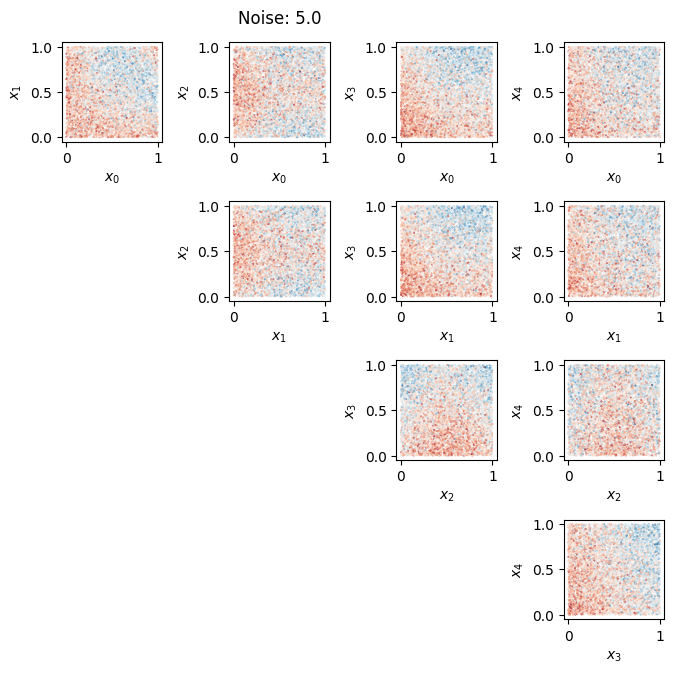

In [ ]:
# Generazione dataset + plotting

import numpy as np

n_samples  = 10000
n_features = 5
noise = [0.5,5.]

XA  = np.random.uniform(size=(n_samples, n_features))
XB = np.random.uniform(size=(n_samples, n_features))

def gen_samp(n_samples, n_features, sigma):
  samples = []
  targets = []
  for eps in sigma:
    x = np.random.uniform(size=(n_samples, n_features))
    out = ( 10 * np.sin(np.pi * x[:, 0] * x[:, 1])
          + 20 * (x[:, 2] - 0.5) ** 2
          + 10 * x[:, 3]
          + 5 * x[:, 4]
         + eps * np.random.normal(size=(n_samples))
    )
    samples.append(x)
    targets.append(out)

  return samples, targets

X, Y   = gen_samp(n_samples, n_features, noise) 

labels_latex = ['$x_0$','$x_1$','$x_2$','$x_3$','$x_4$']
labels = ['x0','x1','x2','x3','x4']
import matplotlib.pyplot as plt

for idx, smp in enumerate(noise):

  fig = plt.figure(figsize=(8,8))
  st = fig.suptitle('Noise: '+str(smp))
  k = 0
  for i in range(n_features):
    for j in range(n_features):
      k += 1
      if (j >= i+1):
        plt.subplot(n_features,n_features,k)
        plt.scatter((X[idx])[:,i], (X[idx])[:,j], c=Y[idx], marker=".", s=0.4, cmap='RdBu', alpha=0.9 )
        plt.xlabel(labels_latex[i])
        plt.ylabel(labels_latex[j])

  plt.tight_layout()
  plt.show()

In [ ]:
# splitting
from sklearn.model_selection import train_test_split
train_to_rest_ratio=0.6 # training sample 60%
vali_to_test_ratio=0.5  #  validation and test sets: 50%-50% of remianining 40%

rnd_ini=42

XA_train,XA_test,YA_train,YA_test=train_test_split(X[0],Y[0],train_size=train_to_rest_ratio, shuffle=True, random_state=rnd_ini)
XA_vali, XA_test,YA_vali,YA_test=train_test_split(XA_test,YA_test,train_size=vali_to_test_ratio, shuffle=True, random_state=rnd_ini)

XB_train,XB_test,YB_train,YB_test=train_test_split(X[1],Y[1],train_size=train_to_rest_ratio, shuffle=True, random_state=rnd_ini)
XB_vali, XB_test,YB_vali,YB_test=train_test_split(XB_test,YB_test,train_size=vali_to_test_ratio, shuffle=True, random_state=rnd_ini)

# in questo caso la normalizzazione delle feature non è  necessaria visto che hanno tutte stesso range dinamico, inserirla o meno è una scelta accettabile in ogni caso. 

  2 MSE train: 0.567
  2 MSE vali: 1.564
  5 MSE train: 0.787
  5 MSE vali: 1.195
 10 MSE train: 0.910
 10 MSE vali: 1.152
 20 MSE train: 1.123
 20 MSE vali: 1.249
100 MSE train: 2.273
100 MSE vali: 2.292


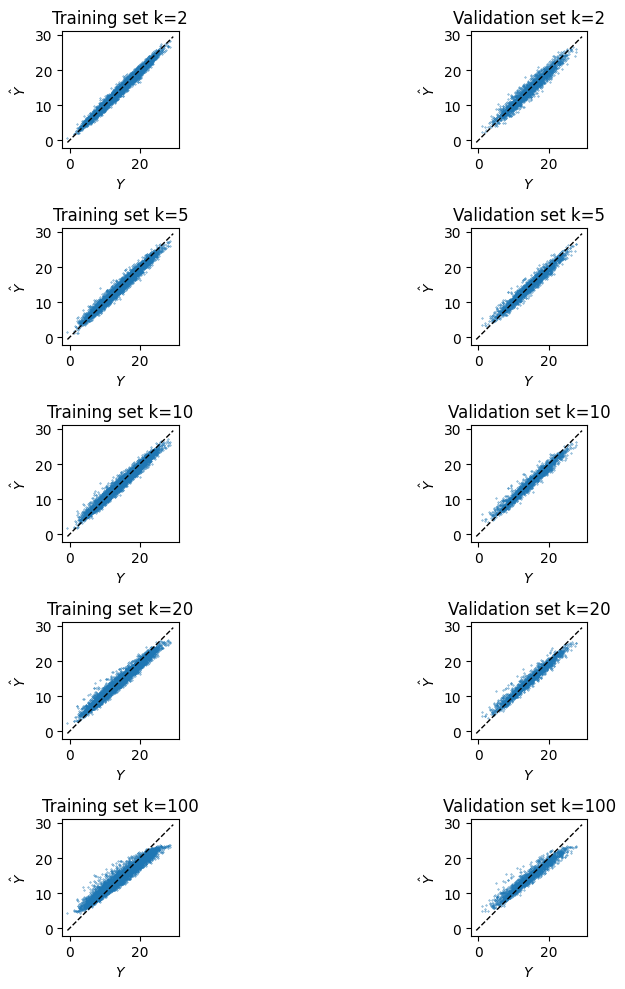

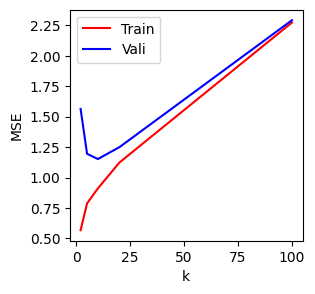

In [ ]:
# algoritmo k-primi vicini per diversi valori di k
# si usa come metrica il validation set e si ottmizza rispetto a MSE (possibile usare altre metriche senza problemi: tipo R2 score o MAE)

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train = XA_train
Y_train = YA_train
X_vali = XA_vali
Y_vali = YA_vali
X_test = XA_test
Y_test = YA_test
min_r = min_Y[0]
max_r = max_Y[0]

mse_train = []
mse_vali = []

k_val = [2, 5,10, 20, 100]

plt.figure(figsize=(10,10))

for index, k in enumerate(k_val):
   model_knn = neighbors.KNeighborsRegressor(k)
   model_knn.fit(X_train, Y_train)

   pred_train = model_knn.predict(X_train)
   pred_vali = model_knn.predict(X_vali)

   mse_t = mean_squared_error(Y_train, pred_train)
   mse_v  = mean_squared_error(Y_vali, pred_vali) 
   print(f'{k:3d} MSE train: {mse_t:.3f}')
   print(f'{k:3d} MSE vali: {mse_v:.3f}')
   mse_train.append(mse_t)
   mse_vali.append(mse_v)

   plt.subplot(5,2,2*index+1)
   plt.title('Training set k='+str(k))
   plt.scatter(Y_train,pred_train, s=0.1)
   plt.plot([min_r,max_r],[min_r,max_r], color='black', linewidth=1, linestyle='dashed')
   plt.ylabel('$\hat{Y}$')
   plt.xlabel('$Y$')
   plt.axis('square')

   plt.subplot(5,2,2*index+2)
   plt.title('Validation set k='+str(k))
   plt.scatter(Y_vali,pred_vali, s=0.1)
   plt.plot([min_r,max_r],[min_r,max_r], color='black', linewidth=1, linestyle='dashed')
   plt.ylabel('$\hat{Y}$')
   plt.xlabel('$Y$')
   plt.axis('square')


plt.tight_layout()
plt.show()


plt.figure(figsize=(3,3))

plt.plot(k_val, mse_train, '-r', label='Train')
plt.plot(k_val, mse_vali,  '-b', label='Vali')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

MAE test:  0.8115039852330758


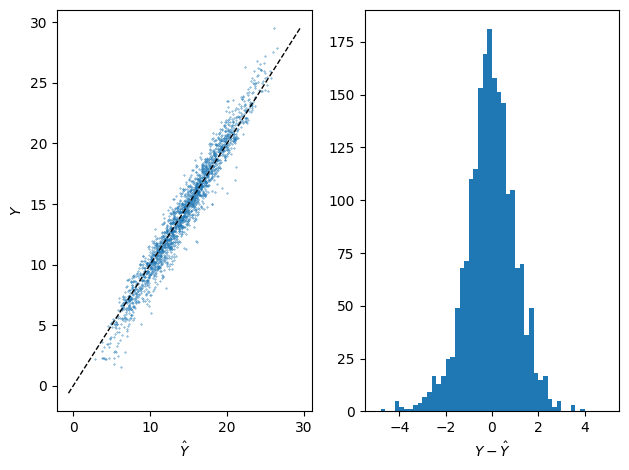

In [ ]:
# modello ottimale

model_knn = neighbors.KNeighborsRegressor(k_val[np.argmin(mse_vali)])
model_knn.fit(X_train, Y_train)

pred_test = model_knn.predict(X_test)

print('MAE test: ',mean_absolute_error(Y_test, pred_test))

plt.subplot(1,2,1)
plt.scatter(pred_test, Y_test, s=0.1)
plt.plot([min_r,max_r],[min_r,max_r], color='black', linewidth=1, linestyle='dashed')
plt.xlabel('$\hat{Y}$')
plt.ylabel('$Y$')

plt.subplot(1,2,2)
plt.hist(Y_test-pred_test, bins=50, range=[-5.,5.])
plt.xlabel('$Y-\hat{Y}$')
plt.tight_layout()


 10 MSE train: 23.115
 10 MSE vali: 28.095
 20 MSE train: 24.377
 20 MSE vali: 27.311
100 MSE train: 26.641
100 MSE vali: 27.383
150 MSE train: 27.171
150 MSE vali: 27.855
200 MSE train: 27.716
200 MSE vali: 28.247


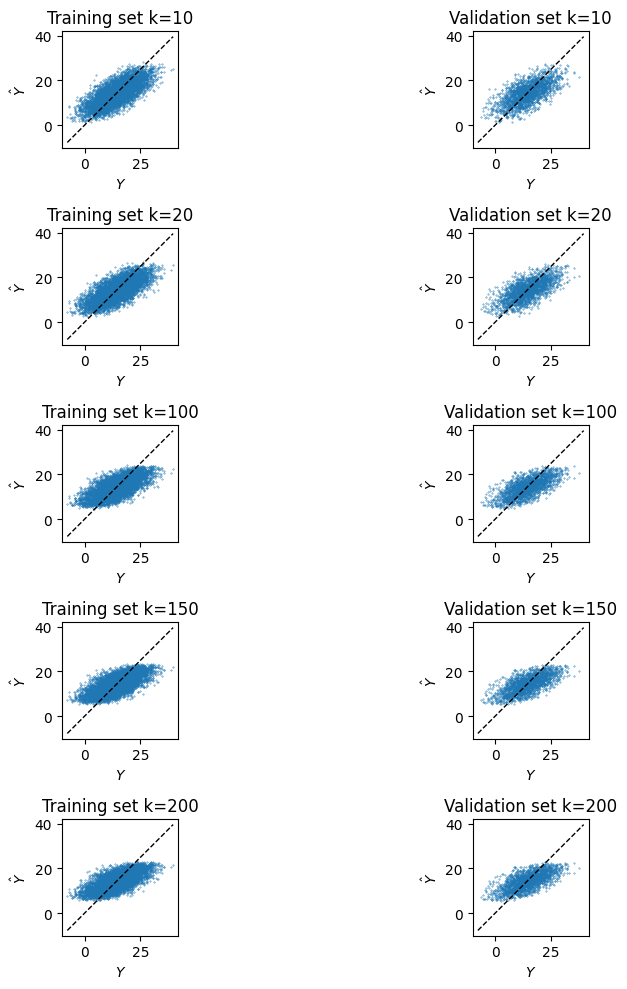

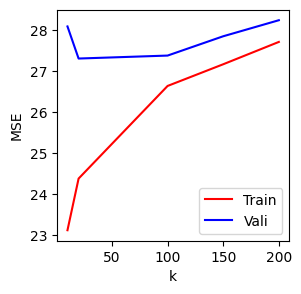

In [ ]:
# idem per il secondo campione

X_train = XB_train
Y_train = YB_train
X_vali = XB_vali
Y_vali = YB_vali
X_test = XB_test
Y_test = YB_test
min_r = min_Y[1]
max_r = max_Y[1]

mse_train = []
mse_vali = []

k_val = [10, 20, 100, 150, 200]

plt.figure(figsize=(10,10))

for index, k in enumerate(k_val):
   model_knn = neighbors.KNeighborsRegressor(k)
   model_knn.fit(X_train, Y_train)

   pred_train = model_knn.predict(X_train)
   pred_vali = model_knn.predict(X_vali)

   mse_t = mean_squared_error(Y_train, pred_train)
   mse_v  = mean_squared_error(Y_vali, pred_vali) 
   print(f'{k:3d} MSE train: {mse_t:.3f}')
   print(f'{k:3d} MSE vali: {mse_v:.3f}')
   mse_train.append(mse_t)
   mse_vali.append(mse_v)

   plt.subplot(5,2,2*index+1)
   plt.title('Training set k='+str(k))
   plt.scatter(Y_train,pred_train, s=0.1)
   plt.plot([min_r,max_r],[min_r,max_r], color='black', linewidth=1, linestyle='dashed')
   plt.ylabel('$\hat{Y}$')
   plt.xlabel('$Y$')
   plt.axis('square')

   plt.subplot(5,2,2*index+2)
   plt.title('Validation set k='+str(k))
   plt.scatter(Y_vali,pred_vali, s=0.1)
   plt.plot([min_r,max_r],[min_r,max_r], color='black', linewidth=1, linestyle='dashed')
   plt.ylabel('$\hat{Y}$')
   plt.xlabel('$Y$')
   plt.axis('square')


plt.tight_layout()
plt.show()


plt.figure(figsize=(3,3))

plt.plot(k_val, mse_train, '-r', label='Train')
plt.plot(k_val, mse_vali,  '-b', label='Vali')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

MAE test:  4.118357324061836


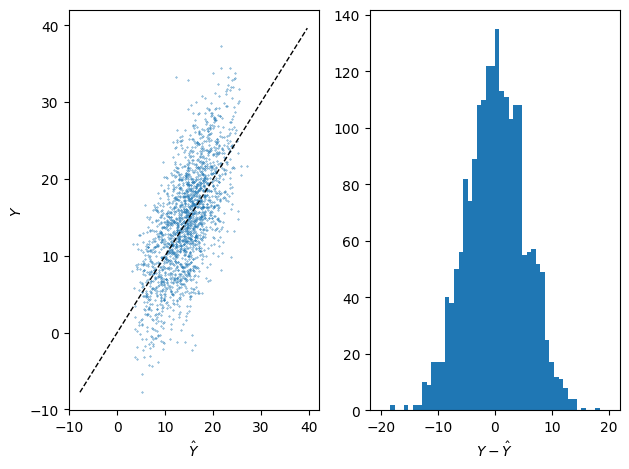

In [ ]:
model_knn = neighbors.KNeighborsRegressor(k_val[np.argmin(mse_vali)])
model_knn.fit(X_train, Y_train)

pred_test = model_knn.predict(X_test)

print('MAE test: ',mean_absolute_error(Y_test, pred_test))

plt.subplot(1,2,1)
plt.scatter(pred_test, Y_test, s=0.1)
plt.plot([min_r,max_r],[min_r,max_r], color='black', linewidth=1, linestyle='dashed')
plt.xlabel('$\hat{Y}$')
plt.ylabel('$Y$')

plt.subplot(1,2,2)
plt.hist(Y_test-pred_test, bins=50, range=[-20.,20.])
plt.xlabel('$Y-\hat{Y}$')
plt.tight_layout()


coeff. of determination R^2 score (train/vali/test):  0.9210159728322559 0.43760371930771735 0.41569548238018283
MAE train/vali/test:  1.5469790696793837  /  4.223527161338414  /  4.210667140445722


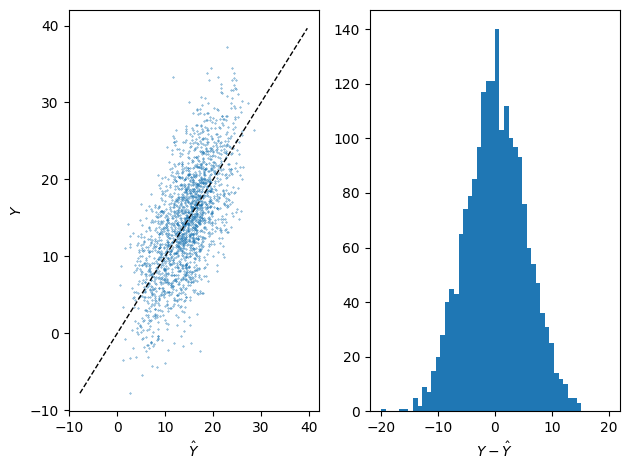

In [ ]:
# RandomForest per il campione B (esempio con 100 alberi, si potevano testare più valiri del numerio di alberi: 10, 50, 100, 250, 500) per esempio 
# per trovare il modello migliore ma i risultati non sarebbero cambiati molto

from sklearn.ensemble import RandomForestRegressor

myRF_reg = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2, # minimum number of sample per leaf
    criterion='squared_error', #MSE loss (se si vuole usare la MAE: 'absolute_error')
    random_state=0
)

myRF_reg.fit(X_train, Y_train)
train_score = myRF_reg.score(X_train, Y_train)
val_score = myRF_reg.score(X_vali, Y_vali)
test_score = myRF_reg.score(X_test, Y_test)
                              
print('coeff. of determination R^2 score (train/vali/test): ',train_score,val_score,test_score)

pred_train = myRF_reg.predict(X_train)
pred_vali = myRF_reg.predict(X_vali)
pred_test = myRF_reg.predict(X_test)
mae_train = mean_absolute_error(Y_train, pred_train)
mae_vali = mean_absolute_error(Y_vali, pred_vali)
mae_test = mean_absolute_error(Y_test, pred_test)
print('MAE train/vali/test: ',mae_train, ' / ', mae_vali, ' / ', mae_test)

plt.subplot(1,2,1)
plt.scatter(pred_test, Y_test, s=0.1)
plt.plot([min_r,max_r],[min_r,max_r], color='black', linewidth=1, linestyle='dashed')
plt.xlabel('$\hat{Y}$')
plt.ylabel('$Y$')

plt.subplot(1,2,2)
plt.hist(Y_test-pred_test, bins=50, range=[-20.,20.])
plt.xlabel('$Y-\hat{Y}$')
plt.tight_layout()

In [ ]:
# la RandomForest non fa melgio del k-NN, questo e' dovuto al fatto che il secondo campione è dominato dal rumore gaussiano non 
# riducibile (ricorda errore del singolo modello nell'ensamble = Bias^2 + Variance + Noise con Noise non riducibile)